# Проблема 1. Nikkei 225 Stock Average

### (1) Загрузка данных

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import kurtosis, skew

In [20]:
nikkei_data = pd.read_csv('NIKKEI225.csv', parse_dates=['Date'], index_col='Date')
    # parse_dates=['Date'] - автоматически преобразует колонку 'Date' в формат datetime
    # index_col='Date' - устанавливает колонку 'Date' в качестве индекса таблицы

# сортируем данные в хронологическом порядке, чтобы потом правильно работали все функции
nikkei_data = nikkei_data.sort_index()

nikkei_data.tail(15)

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2025-01-14,14,39010.96,39054.35,38305.91,38474.30,38474.30,126900000
2025-01-15,13,38721.61,38774.99,38316.01,38444.58,38444.58,100700000
2025-01-16,12,38732.65,38932.54,38426.20,38572.60,38572.60,114200000
2025-01-17,11,38454.10,38503.94,38055.68,38451.46,38451.46,115300000
2025-01-20,10,38671.77,39032.93,38671.77,38902.50,38902.50,87500000
2025-01-21,9,39163.53,39238.21,38643.84,39027.98,39027.98,93300000
2025-01-22,8,39355.22,39694.57,39332.63,39646.25,39646.25,108500000
2025-01-23,7,39810.06,40036.07,39677.22,39958.87,39958.87,119100000
2025-01-24,6,40060.49,40279.79,39806.69,39931.98,39931.98,122600000


### (2) Удаление пропущенных значений

Фактически мы уже получили данные, где были удалены пропущенные значения в виде праздников/выходных

In [22]:
nikkei_data.dropna(inplace=True)
nikkei_data.tail(15)

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2025-01-14,14,39010.96,39054.35,38305.91,38474.30,38474.30,126900000
2025-01-15,13,38721.61,38774.99,38316.01,38444.58,38444.58,100700000
2025-01-16,12,38732.65,38932.54,38426.20,38572.60,38572.60,114200000
2025-01-17,11,38454.10,38503.94,38055.68,38451.46,38451.46,115300000
2025-01-20,10,38671.77,39032.93,38671.77,38902.50,38902.50,87500000
2025-01-21,9,39163.53,39238.21,38643.84,39027.98,39027.98,93300000
2025-01-22,8,39355.22,39694.57,39332.63,39646.25,39646.25,108500000
2025-01-23,7,39810.06,40036.07,39677.22,39958.87,39958.87,119100000
2025-01-24,6,40060.49,40279.79,39806.69,39931.98,39931.98,122600000


### (3) Доходности

#### Логарифмические доходности

In [26]:
nikkei_data['log_returns'] = np.log(nikkei_data['Close']).diff()
    # .diff() - вычисляет разницу между текущим и предыдущим значением в столбце, свойство логарифмов

nikkei_data.head(15)

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,log_returns
Date,,,,,,,,
1965-01-05,14772,1257.72,1257.72,1257.72,1257.72,1257.72,-,NaN
1965-01-06,14771,1263.99,1263.99,1263.99,1263.99,1263.99,-,0.004973
1965-01-07,14770,1274.27,1274.27,1274.27,1274.27,1274.27,-,0.008100
1965-01-08,14769,1286.43,1286.43,1286.43,1286.43,1286.43,-,0.009497
1965-01-12,14768,1288.54,1288.54,1288.54,1288.54,1288.54,-,0.001639
1965-01-13,14767,1281.67,1281.67,1281.67,1281.67,1281.67,-,-0.005346
1965-01-14,14766,1289.50,1289.50,1289.50,1289.50,1289.50,-,0.006091
1965-01-18,14765,1271.68,1271.68,1271.68,1271.68,1271.68,-,-0.013916
1965-01-19,14764,1270.34,1270.34,1270.34,1270.34,1270.34,-,-0.001054


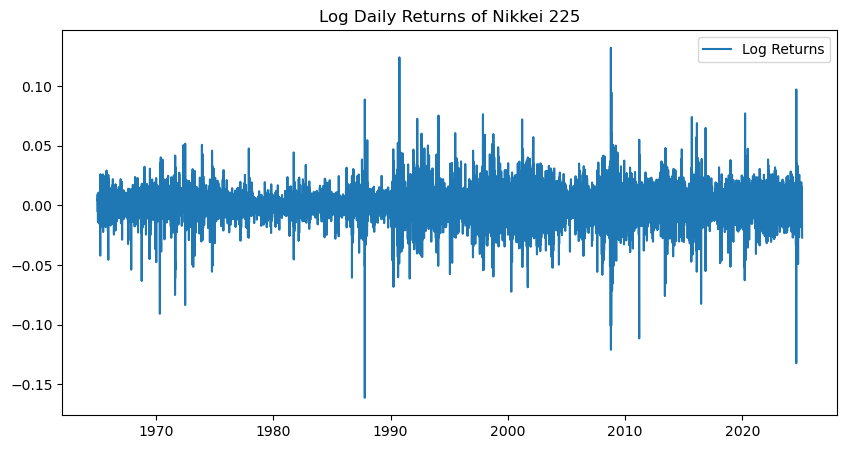

In [28]:
plt.figure(figsize=(10,5))
plt.plot(nikkei_data.index, nikkei_data['log_returns'], label='Log Returns')
plt.legend()
plt.title('Log Daily Returns of Nikkei 225')
plt.show()

#### Обыконовенные доходности

In [32]:
nikkei_data['simple_returns'] = nikkei_data['Close'].pct_change()
    # процентное изменение цены

nikkei_data.head(15)

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,log_returns,simple_returns
Date,,,,,,,,,
1965-01-05,14772,1257.72,1257.72,1257.72,1257.72,1257.72,-,NaN,NaN
1965-01-06,14771,1263.99,1263.99,1263.99,1263.99,1263.99,-,0.004973,0.004985
1965-01-07,14770,1274.27,1274.27,1274.27,1274.27,1274.27,-,0.008100,0.008133
1965-01-08,14769,1286.43,1286.43,1286.43,1286.43,1286.43,-,0.009497,0.009543
1965-01-12,14768,1288.54,1288.54,1288.54,1288.54,1288.54,-,0.001639,0.001640
1965-01-13,14767,1281.67,1281.67,1281.67,1281.67,1281.67,-,-0.005346,-0.005332
1965-01-14,14766,1289.50,1289.50,1289.50,1289.50,1289.50,-,0.006091,0.006109
1965-01-18,14765,1271.68,1271.68,1271.68,1271.68,1271.68,-,-0.013916,-0.013819
1965-01-19,14764,1270.34,1270.34,1270.34,1270.34,1270.34,-,-0.001054,-0.001054


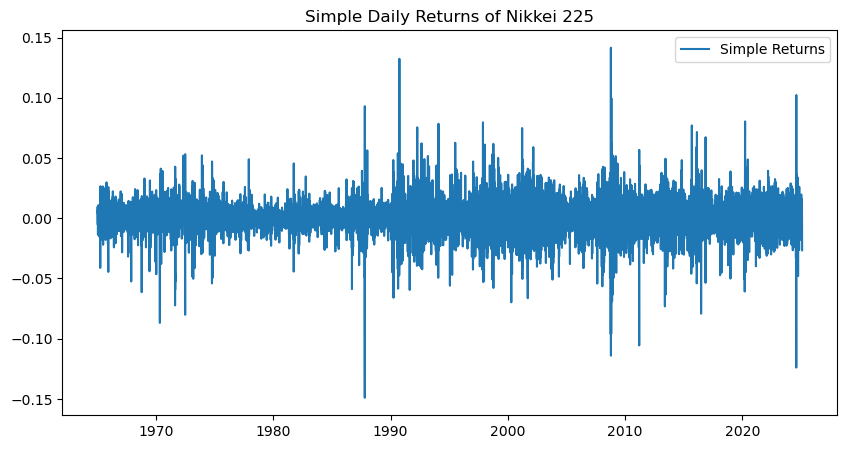

In [34]:
plt.figure(figsize=(10,5))
plt.plot(nikkei_data.index, nikkei_data['simple_returns'], label='Simple Returns')
plt.legend()
plt.title('Simple Daily Returns of Nikkei 225')
plt.show()

#### Статистика

In [36]:
stats = nikkei_data[['log_returns', 'simple_returns']].describe()
stats.loc['skew'] = [skew(nikkei_data['log_returns'].dropna()), skew(nikkei_data['simple_returns'].dropna())]
stats.loc['kurt'] = [kurtosis(nikkei_data['log_returns'].dropna()), kurtosis(nikkei_data['simple_returns'].dropna())]
stats.transpose()

,count,mean,std,min,25%,50%,75%,max,skew,kurt
log_returns,14772.0,0.000232,0.012749,-0.161354,-0.005478,0.000427,0.006399,0.132346,-0.433992,9.706892
simple_returns,14772.0,0.000313,0.012724,-0.149009,-0.005463,0.000427,0.006419,0.141503,-0.216771,9.264531


### (4) Доходности по месяцам

In [40]:
# создаем доп. таблицу: месяц - последняя цена закрытия - месячная доходность
monthly_returns_table = nikkei_data['Close'].resample('M').last().to_frame()

# переименовываем столбец
monthly_returns_table.rename(columns={'Close': 'Last_Close_Price'}, inplace=True)

# рассчитываем месячные доходности
monthly_returns_table['monthly_simple_returns_eop'] = monthly_returns_table['Last_Close_Price'].pct_change()
monthly_returns_table['monthly_log_returns_eop'] = np.log(monthly_returns_table['Last_Close_Price']).diff()

# удаляем последнее наблюдение, иначе автоматически проставляется доходность на 2025-02-28, а мы её не можем ещё знать
# доходность на 2025-02-28 - это фактически доходность на последнюю известную дату февраля 2025, то есть 3.02.2025
monthly_returns_table = monthly_returns_table.iloc[:-1]

# изменяем формат индекса на 'YYYY-MM'
monthly_returns_table.index = monthly_returns_table.index.strftime('%Y-%m')


monthly_returns_table

/var/folders/6p/8d5pp0rd4_sbkn9mzjsq45rr0000gn/T/ipykernel_85568/3770559413.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns_table = nikkei_data['Close'].resample('M').last().to_frame()


,Last_Close_Price,monthly_simple_returns_eop,monthly_log_returns_eop
Date,,,
1965-01,1242.27,NaN,NaN
1965-02,1213.07,-0.023505,-0.023786
1965-03,1132.77,-0.066196,-0.068488
1965-04,1176.64,0.038728,0.037997
1965-05,1096.60,-0.068024,-0.070448
...,...,...,...
2024-09,37919.55,-0.018842,-0.019022
2024-10,39081.25,0.030636,0.030176
2024-11,38208.03,-0.022344,-0.022597


# Проблема 2.  US Consumer Price Index

### (1) Загрузка данных

Заметим, что данные представлены не как процентное изменение

In [44]:
cpi_data = pd.read_csv('CPIAUCSL.csv', parse_dates=['observation_date'], index_col='observation_date')
    # parse_dates=['observation_date'] - преобразует 'observation_date' в формат datetime
    # index_col='observation_date' - делает колонку 'observation_date' индексом таблицы

cpi_data.tail(15)

,CPIAUCSL
observation_date,
2023-10-01,307.531
2023-11-01,308.024
2023-12-01,308.742
2024-01-01,309.685
2024-02-01,311.054
2024-03-01,312.230
2024-04-01,313.207
2024-05-01,313.225
2024-06-01,313.049


### (2) Inflation rate

Explain why we can interpret logarithmic returns as the inflation rate? 
Логарифмические доходности являются по сути процентным изменением, поэтому их можно интерпретировать как процентное изменение уровня цен, то есть темп инфляции

In [48]:
cpi_data['log_inflation'] = np.log(cpi_data['CPIAUCSL'].asfreq('MS')).diff()
    # устанавливаем asfreq('MS') явно как начало месяца

cpi_data.tail(15)
cpi_data.head(15)

,CPIAUCSL,log_inflation
observation_date,,
1947-01-01,21.48,NaN
1947-02-01,21.62,0.006497
1947-03-01,22.00,0.017424
1947-04-01,22.00,0.000000
1947-05-01,21.95,-0.002275
1947-06-01,22.08,0.005905
1947-07-01,22.23,0.006771
1947-08-01,22.40,0.007618
1947-09-01,22.84,0.019452


### (3) Inflation rate

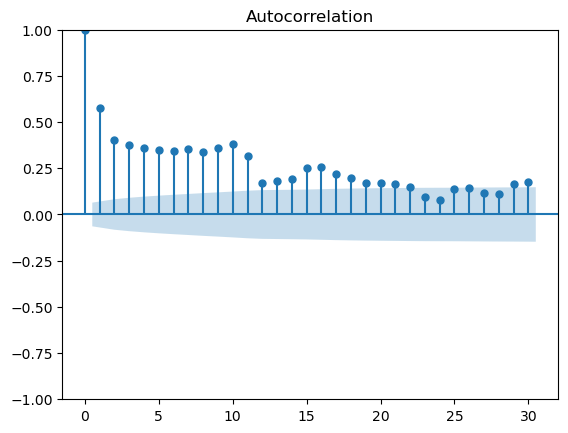

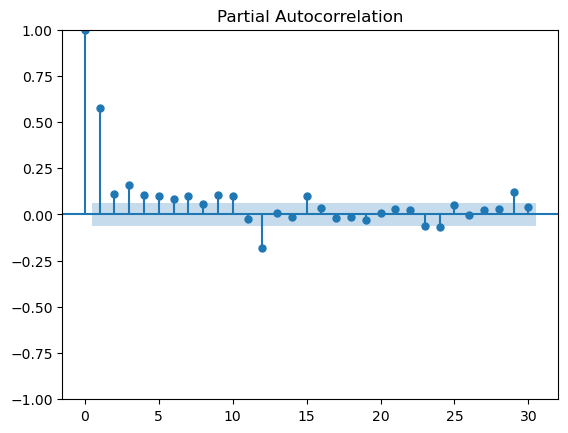

In [50]:
plot_acf(cpi_data['log_inflation'].dropna())
plot_pacf(cpi_data['log_inflation'].dropna())
plt.show()

ACF и PACF выглядят, скорее, как AR, где PACF прерывается после первого шага. Однако ACF не убывает экспоненциально. Вид нетипичный. 

#### Ljung–Box statistics

In [52]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box_results = acorr_ljungbox(cpi_data['log_inflation'].dropna(), lags=list(range(1, 16)), return_df=True).round(3)
print('Ljung–Box test results:')
ljung_box_results

Ljung–Box test results:


,lb_stat,lb_pvalue
1,309.657,0.0
2,463.154,0.0
3,596.620,0.0
4,717.757,0.0
5,832.074,0.0
6,942.754,0.0
7,1060.880,0.0
8,1170.498,0.0
9,1292.565,0.0
10,1429.812,0.0


Тест L-B - отличие от нуля сразу нескольких коэффициентов автокорреляции. 

Перебрала лаги от 1 до 15 включительно, везде p-value < 5%, то есть нулевая гипотеза о равенстве коэффициентов нулю отвергается, представленные данные - не white noise, есть автокорреляция. Это видно и по графику.

### (4)-(5) ARMA models of order (p, q) + AIC, BIC

In [54]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [74]:
arma_orders = []
for p in range(6): # перебор моделей
    for q in range(6 - p): # ограничение на сумму p и q
        try:
            model = ARIMA(cpi_data['log_inflation'].dropna(), order=(p, 0, q)).fit()
            aic = model.aic
            bic = model.bic
            arma_orders.append(((p, q), aic, bic))
        except:
            continue
arma_orders = sorted(arma_orders, key=lambda x: x[1]) # сортируем по наименьшему AIC

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be use

In [77]:
for order, aic, bic in arma_orders:
    print(f'ARMA{order}: AIC={aic}, BIC={bic}')

best_aic_order = min(arma_orders, key=lambda x: x[1])[0]
best_bic_order = min(arma_orders, key=lambda x: x[2])[0]
print(f'Best AIC model: ARMA{best_aic_order}')
print(f'Best BIC model: ARMA{best_bic_order}')

ARMA(1, 2): AIC=-8409.662848497255, BIC=-8385.460115850812
ARMA(2, 2): AIC=-8408.63601807045, BIC=-8379.592738894718
ARMA(2, 3): AIC=-8408.16631437761, BIC=-8374.282488672588
ARMA(3, 2): AIC=-8405.253271595891, BIC=-8371.36944589087
ARMA(1, 3): AIC=-8403.552303057393, BIC=-8374.509023881661
ARMA(1, 4): AIC=-8402.836325735505, BIC=-8368.952500030484
ARMA(5, 0): AIC=-8388.182294229788, BIC=-8354.298468524767
ARMA(4, 0): AIC=-8381.31320991119, BIC=-8352.269930735458
ARMA(4, 1): AIC=-8375.850549044186, BIC=-8341.966723339165
ARMA(3, 0): AIC=-8372.857150782373, BIC=-8348.65441813593
ARMA(3, 1): AIC=-8364.611573974482, BIC=-8335.56829479875
ARMA(1, 1): AIC=-8360.633418536378, BIC=-8341.271232419223
ARMA(2, 0): AIC=-8350.889266358503, BIC=-8331.527080241349
ARMA(2, 1): AIC=-8340.580105681289, BIC=-8316.377373034846
ARMA(1, 0): AIC=-8340.357817553955, BIC=-8325.836177966088
ARMA(0, 5): AIC=-8331.752874859001, BIC=-8297.86904915398
ARMA(0, 4): AIC=-8318.919388699747, BIC=-8289.876109524015
ARMA

### (6) Residuals are to be a white noise in ARMA

How can you test this requirement for the chosen model(s)? Можно построить ACF и PACF и посмотреть: функции должны обрываться уже на первом шаге. 

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


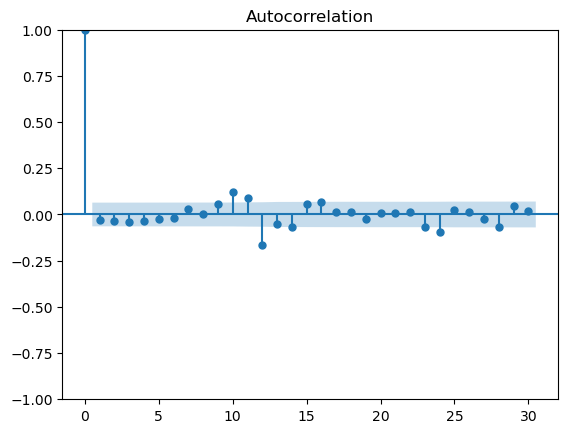

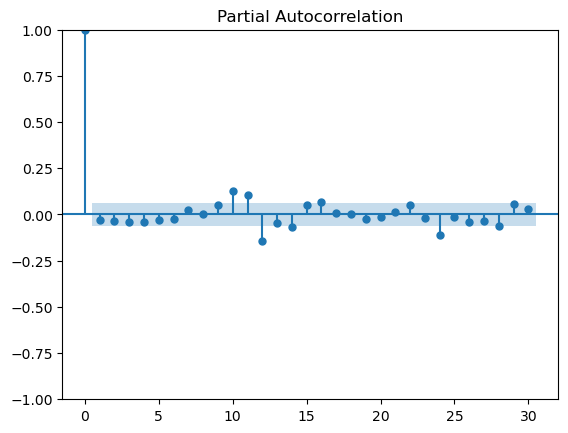

In [89]:
arma_model = ARIMA(cpi_data['log_inflation'].dropna(), order=(best_aic_order[0], 0, best_aic_order[1])).fit()
residuals = arma_model.resid
plot_acf(residuals)
plot_pacf(residuals)
plt.show()

Видно из графика, функции правда обрываются после первого шага, однако есть некоторые коэффициенты, которые лежат вне пределов доверительного интервала (закрашенная область). Для проверки того, являются ли эти коэффициенты совместно незначимы, можно провести тест Ljung-Box. Количество рассматриваемых лагов - 15, так как около 15 значения коэффициент выходит за область доверительного интервала. 

Нулевая гипотеза: коэффициенты автокорреляции совместно незначимы, равны нулю, то есть ошибки ~ white noise

In [87]:
acorr_ljungbox(residuals, lags=15, return_df=True).round(2)

,lb_stat,lb_pvalue
1,0.43,0.51
2,2.02,0.36
3,2.15,0.54
4,2.21,0.70
5,2.33,0.80
6,2.33,0.89
7,3.31,0.85
8,3.31,0.91
9,4.80,0.85
10,18.20,0.05


По тесту, не все значения p-value больше 5%, нельзя принять нулевую гипотезу о том, что ошибки - white noise. Ошибки автокоррелированы.

Это неплохая иллюстрация того, что оптимальная модель по информационным критериям не обязательно является лучшей. IC стоит применять только после того, как мы убедились, что остатки модели - действительно белый шум. 

Можно попробовать подобрать модель с другими параметрами p и q

### (7) Estimate all the models from step (4) using data from the beginning of the data up to December 2023

In [60]:
train_data = cpi_data.loc[:'2023-12']
test_data = cpi_data.loc['2024']

models_trained = {} # храним модели

# перебираем все модели ARMA, подобранные ранее
model_results = []  # cписок для хранения результатов
for order, _, _ in arma_orders:
    try:
        model = ARIMA(train_data['log_inflation'].dropna(), order=(order[0], 0, order[1])).fit()
        models_trained[order] = model
        model_results.append([order, model.aic, model.bic])  # сохраняем результаты
    except:
        continue

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be use

In [62]:
# датафрейм с результатами оценки моделей
models_df = pd.DataFrame(model_results, columns=['Order (p,d,q)', 'AIC', 'BIC'])
print(models_df)

   Order (p,d,q)          AIC          BIC
0         (1, 2) -8292.654112 -8268.515966
1         (2, 2) -8291.399867 -8262.434091
2         (2, 3) -8290.928767 -8257.135363
3         (3, 2) -8288.440361 -8254.646957
4         (1, 3) -8286.846851 -8257.881076
5         (1, 4) -8286.043377 -8252.249973
6         (5, 0) -8271.274869 -8237.481464
7         (4, 0) -8264.582563 -8235.616787
8         (4, 1) -8259.150830 -8225.357425
9         (3, 0) -8256.103775 -8231.965628
10        (3, 1) -8247.856812 -8218.891037
11        (1, 1) -8244.017629 -8224.707112
12        (2, 0) -8234.048925 -8214.738408
13        (2, 1) -8223.664753 -8199.526607
14        (1, 0) -8223.383578 -8208.900690
15        (0, 5) -8215.341237 -8181.547832
16        (0, 4) -8202.434848 -8173.469072
17        (0, 3) -8193.508019 -8169.369873
18        (0, 2) -8164.074644 -8144.764127
19        (0, 1) -8117.114397 -8102.631509
20        (0, 0) -7855.720142 -7846.064883


### (8) One-month-ahead forecasts for all the months in 2024

In [64]:
# словарь для хранения прогнозов всех моделей
forecasts = {}

# датафрейм, где уже есть фактические значения инфляции
forecast_df = pd.DataFrame({'Date': test_data.index, 'Actual': test_data['log_inflation']})

# для каждой модели строим прогноз на 2024 год (один месяц вперед)
for order, model in models_trained.items():
    forecast = model.forecast(steps = 12)  # получаем прогнозируемые значения
            # model - модели из предыдущего пункта
            # steps = 12 - для всех 12 месяцев 2024 года
    forecasts[order] = pd.Series(forecast, index=test_data.index)  # преобразуем в Series с индексом дат
    forecast_df[f'Predicted_ARMA{order}'] = forecast  # добавляем прогноз в общий DataFrame

# выводим таблицу с фактическими и предсказанными значениями
forecast_df

,Date,Actual,"Predicted_ARMA(1, 2)","Predicted_ARMA(2, 2)","Predicted_ARMA(2, 3)","Predicted_ARMA(3, 2)","Predicted_ARMA(1, 3)","Predicted_ARMA(1, 4)","Predicted_ARMA(5, 0)","Predicted_ARMA(4, 0)",...,"Predicted_ARMA(1, 1)","Predicted_ARMA(2, 0)","Predicted_ARMA(2, 1)","Predicted_ARMA(1, 0)","Predicted_ARMA(0, 5)","Predicted_ARMA(0, 4)","Predicted_ARMA(0, 3)","Predicted_ARMA(0, 2)","Predicted_ARMA(0, 1)","Predicted_ARMA(0, 0)"
observation_date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,2024-01-01,0.003050,0.002467,0.002479,0.002584,0.002708,0.002765,0.002850,0.002646,0.002425,...,0.002398,0.002457,0.002549,0.002566,0.002771,0.002346,0.002488,0.002916,0.002708,0.002883
2024-02-01,2024-02-01,0.004411,0.002498,0.002511,0.002623,0.002787,0.002862,0.002982,0.002579,0.002292,...,0.002523,0.002606,0.002685,0.002703,0.002451,0.002339,0.002858,0.002904,0.002885,0.002883
2024-03-01,2024-03-01,0.003774,0.002521,0.002531,0.002645,0.002846,0.002877,0.003006,0.002404,0.002393,...,0.002617,0.002696,0.002766,0.002782,0.002491,0.002793,0.002949,0.002887,0.002885,0.002883
2024-04-01,2024-04-01,0.003124,0.002542,0.002551,0.002645,0.002840,0.002877,0.003006,0.002471,0.002522,...,0.002686,0.002759,0.002815,0.002827,0.002801,0.002847,0.002887,0.002887,0.002885,0.002883
2024-05-01,2024-05-01,0.000057,0.002562,0.002569,0.002657,0.002857,0.002877,0.003004,0.002580,0.002584,...,0.002738,0.002801,0.002845,0.002853,0.002887,0.002887,0.002887,0.002887,0.002885,0.002883
2024-06-01,2024-06-01,-0.000562,0.002581,0.002586,0.002661,0.002849,0.002877,0.003003,0.002643,0.002615,...,0.002776,0.002829,0.002862,0.002868,0.002888,0.002887,0.002887,0.002887,0.002885,0.002883
2024-07-01,2024-07-01,0.001548,0.002599,0.002602,0.002670,0.002858,0.002878,0.003001,0.002666,0.002656,...,0.002805,0.002848,0.002873,0.002876,0.002888,0.002887,0.002887,0.002887,0.002885,0.002883
2024-08-01,2024-08-01,0.001870,0.002616,0.002618,0.002676,0.002852,0.002878,0.003000,0.002676,0.002697,...,0.002826,0.002861,0.002880,0.002881,0.002888,0.002887,0.002887,0.002887,0.002885,0.002883
2024-09-01,2024-09-01,0.001797,0.002632,0.002632,0.002683,0.002857,0.002878,0.002999,0.002700,0.002727,...,0.002842,0.002870,0.002884,0.002884,0.002888,0.002887,0.002887,0.002887,0.002885,0.002883


### (9) MSE, MAE, MSPE

В качестве доп. показателя возьмем mean-squared percentage error (MSPE). Ещё одна мера ошибки - MAPE, но применять её не очень хорошо, так как у MAPE природа мультипликативная, а у ARMA аддитивная

In [66]:
from statsmodels.tsa.stattools import arma_order_select_ic
from sklearn.metrics import mean_squared_error, mean_absolute_error

# список для хранения результатов метрик
metrics_results = []

# для каждой модели вычисляем метрики ошибок MSE, MAE и MSPE
for order, forecast in forecasts.items():
    mse = mean_squared_error(test_data['log_inflation'], forecast)  
    mae = mean_absolute_error(test_data['log_inflation'], forecast)  
    mspe = np.mean(((test_data['log_inflation'] - forecast) / test_data['log_inflation'])**2)  # по формуле
    metrics_results.append([order, mse, mae, mspe])
    # print(f'ARMA{order} - MSE: {mse}, MAE: {mae}, MSPE: {mspe}')  # результаты

# датафрейм с результатами метрик
metrics_df = pd.DataFrame(metrics_results, columns=['Order (p,d,q)', 'MSE', 'MAE', 'MSPE'])
metrics_df

,"Order (p,d,q)",MSE,MAE,MSPE
0,"(1, 2)",0.000002,0.001211,161.018805
1,"(2, 2)",0.000002,0.001209,161.849624
2,"(2, 3)",0.000002,0.001200,173.320127
3,"(3, 2)",0.000002,0.001208,201.020064
4,"(1, 3)",0.000002,0.001199,203.912033
5,"(1, 4)",0.000003,0.001202,222.604489
6,"(5, 0)",0.000002,0.001219,163.331225
7,"(4, 0)",0.000002,0.001258,163.823102
8,"(4, 1)",0.000002,0.001269,165.175812
9,"(3, 0)",0.000002,0.001279,170.470883


In [68]:
# лучшая модель по каждой метрике
best_mse_model = metrics_df.loc[metrics_df['MSE'].idxmin()]
best_mae_model = metrics_df.loc[metrics_df['MAE'].idxmin()]
best_mspe_model = metrics_df.loc[metrics_df['MSPE'].idxmin()]

print("Best model by MSE:")
print(best_mse_model)
print ()
print("Best model by MAE:")
print(best_mae_model)
print ()
print("Best model by MSPE:")
print (best_mspe_model)

Best model by MSE:
Order (p,d,q)        (2, 2)
MSE                0.000002
MAE                0.001209
MSPE             161.849624
Name: 1, dtype: object

Best model by MAE:
Order (p,d,q)        (0, 2)
MSE                0.000002
MAE                0.001184
MSPE             205.230469
Name: 18, dtype: object

Best model by MSPE:
Order (p,d,q)        (1, 2)
MSE                0.000002
MAE                0.001211
MSPE             161.018805
Name: 0, dtype: object


Тут уже разные метрики показывают разные результаты.

У MSPE результаты совпадают с результатами информационных критериев.

При этом мы должны выбирать те модели, где ошибки - белый шум. Это может работать не для всех моделей.

# Проблема 3. Характеристическое уравнение

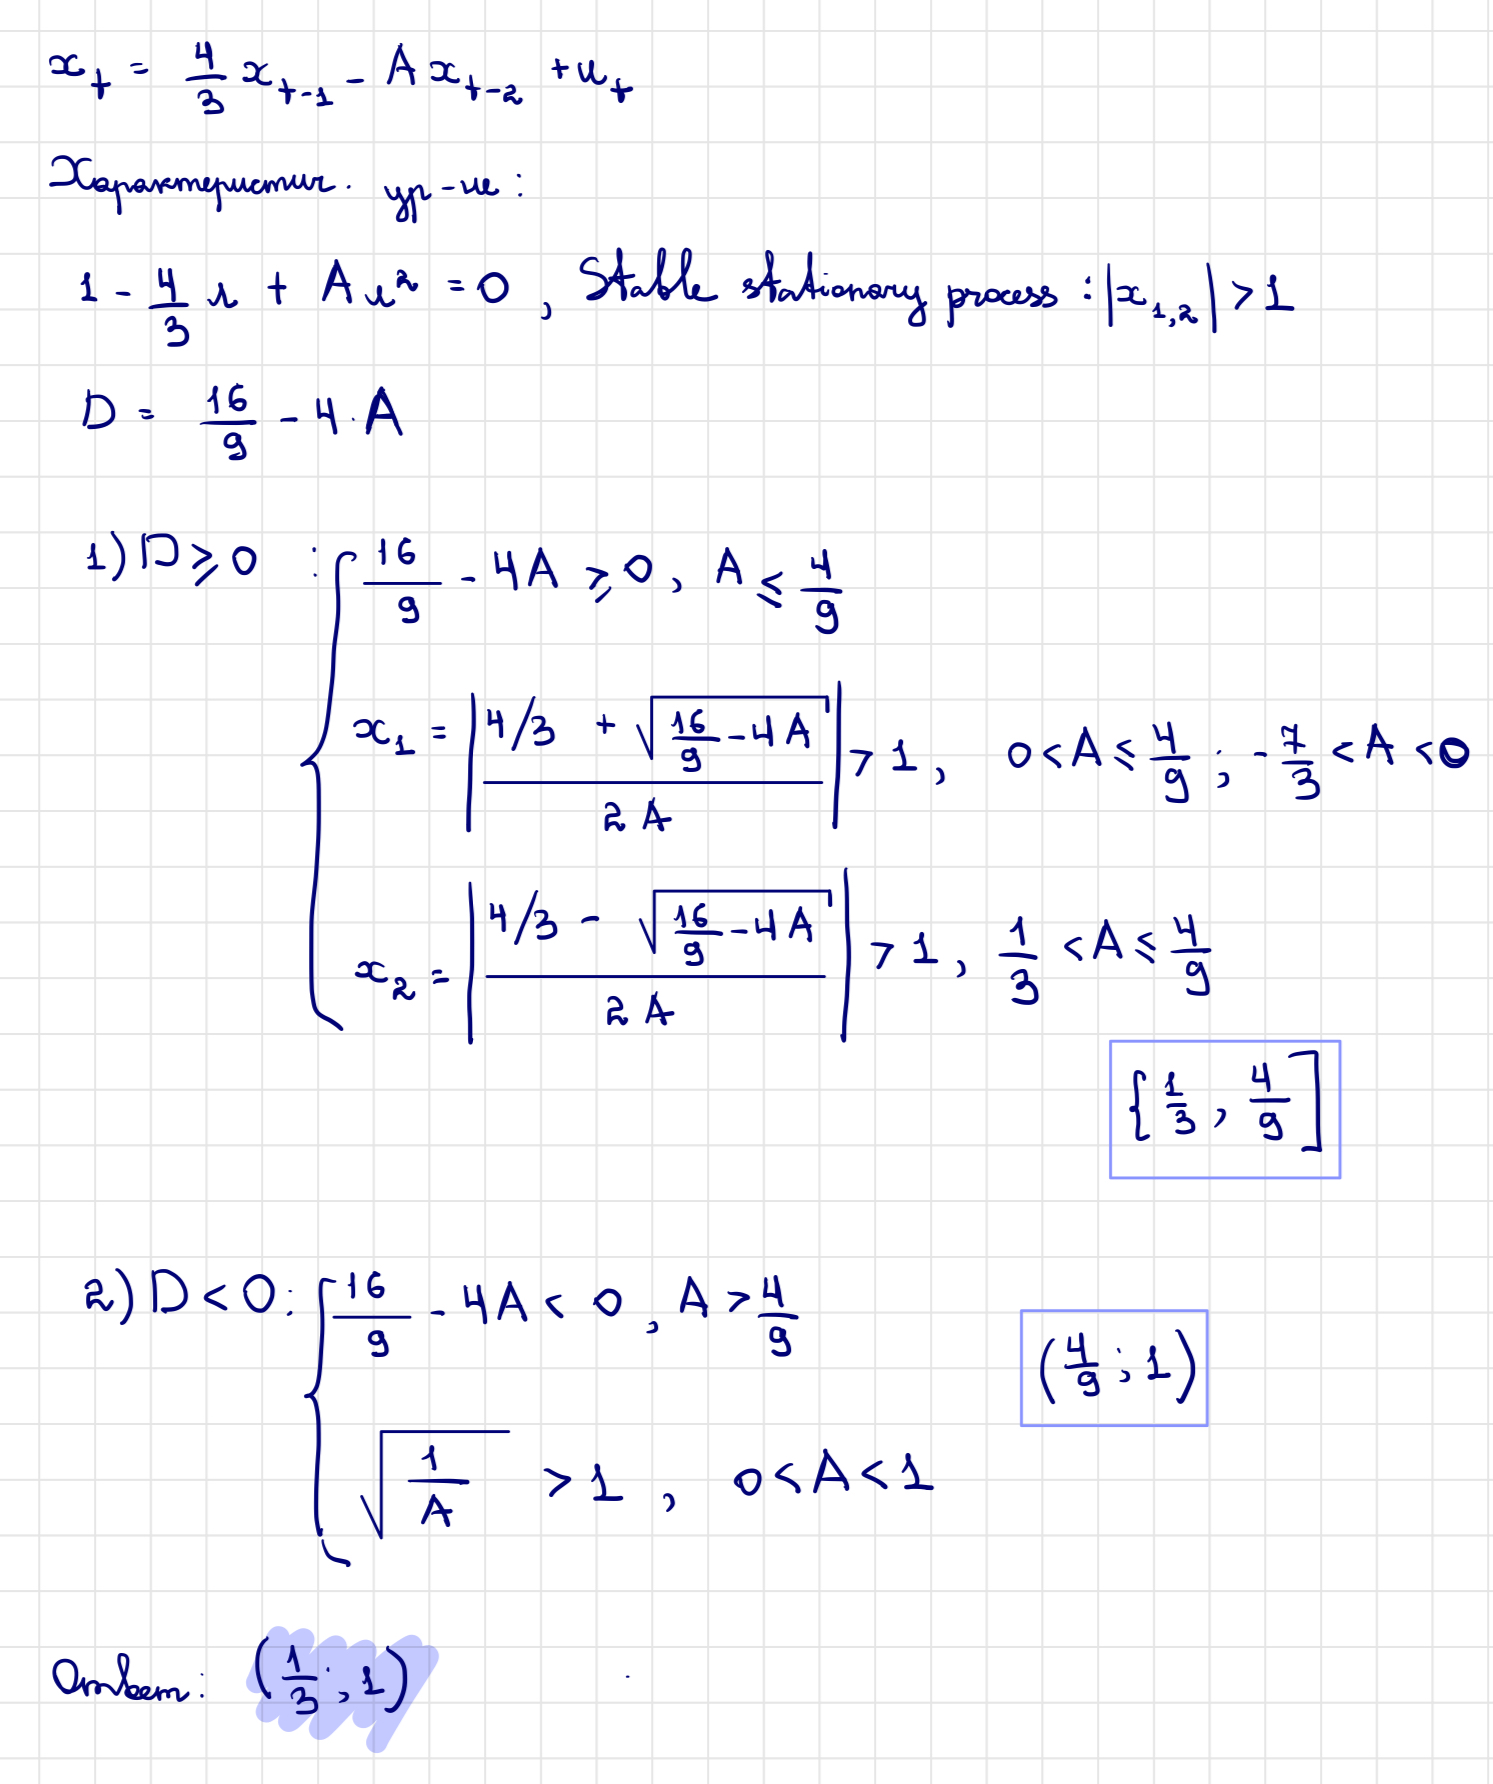